# Importing Necessary Libraries

In this section, we import various libraries that are essential for data manipulation, visualization, preprocessing, clustering, and evaluation.

1. **Pandas and Numpy**:
   - `pandas` is used for data manipulation and analysis. It provides data structures like DataFrames which are very useful for handling structured data.
   - `numpy` is a fundamental package for numerical computations in Python. It provides support for arrays and matrices, along with a collection of mathematical functions to operate on these data structures.

2. **Seaborn and Matplotlib**:
   - `seaborn` is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
   - `matplotlib.pyplot` is a plotting library used for creating static, animated, and interactive visualizations in Python.

3. **Scikit-learn Preprocessing Tools**:
   - `LabelEncoder` is used to convert categorical labels into numerical values, which is essential for machine learning algorithms that require numerical input.
   - `StandardScaler` and `MinMaxScaler` are used for feature scaling. `StandardScaler` standardizes features by removing the mean and scaling to unit variance, while `MinMaxScaler` scales features to a given range, typically between 0 and 1.

4. **Scikit-learn Clustering Algorithms**:
   - `KMeans` is a popular clustering algorithm that partitions data into K distinct clusters based on feature similarity.
   - `MeanShift` is a clustering algorithm that does not require specifying the number of clusters in advance. It works by shifting data points towards the mode (highest density) of the data.
   - `DBSCAN` (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking points that are far away as outliers.
   - `estimate_bandwidth` is used to estimate the bandwidth parameter for the MeanShift algorithm, which determines the size of the region to search for the mode.

5. **Gaussian Mixture Model**:
   - `GaussianMixture` is a probabilistic model for representing normally distributed subpopulations within an overall population. It is used for clustering by fitting the data to a mixture of Gaussian distributions.

6. **Principal Component Analysis (PCA)**:
   - `PCA` is a dimensionality reduction technique that transforms the data into a new coordinate system, reducing the number of dimensions while retaining most of the variance in the data. It is useful for visualizing high-dimensional data and for reducing computational complexity.

7. **Clustering Performance Metrics**:
   - `calinski_harabasz_score` evaluates the clustering by computing the ratio of the sum of between-cluster dispersion and within-cluster dispersion.
   - `davies_bouldin_score` measures the average similarity ratio of each cluster with its most similar cluster, where lower values indicate better clustering.
   - `silhouette_score` measures how similar a data point is to its own cluster compared to other clusters, with higher values indicating better-defined clusters.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from  sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score

# Loading and Cleaning the Dataset

In this section, we load the dataset from an Excel file and perform some basic data cleaning steps.

1. **Loading the Dataset**:
   - `original_df = pd.DataFrame(pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx'))`
   - We use `pd.read_excel` to read the Excel file located at the specified path and load it into a pandas DataFrame named `original_df`.

2. **Dropping Missing Values**:
   - `original_df.dropna(inplace = True)`
   - We use the `dropna` method to remove any rows with missing values from the DataFrame. The `inplace=True` parameter ensures that the changes are made directly to the original DataFrame without creating a copy.

3. **Resetting the Index**:
   - `original_df.reset_index(inplace = True, drop = True)`
   - We reset the index of the DataFrame using the `reset_index` method. The `inplace=True` parameter ensures that the changes are made directly to the original DataFrame. The `drop=True` parameter ensures that the old index is not added as a new column.

4. **Displaying the DataFrame**:
   - `original_df`
   - Finally, we display the cleaned DataFrame to inspect the data.


In [2]:
original_df = pd.DataFrame(pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx'))
original_df.dropna(inplace = True)
original_df.reset_index(inplace = True,drop = True)
original_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
initial_df  = original_df.copy()

In [4]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


# Encoding Categorical Features

In this section, we encode categorical features in the dataset using `LabelEncoder`.

1. **Initializing LabelEncoder**:
   - `le = LabelEncoder()`
   - We create an instance of `LabelEncoder` from the `sklearn.preprocessing` module. This encoder converts categorical labels into numerical values.

2. **Defining Categorical Columns**:
   - `categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']`
   - We define a list of columns that contain categorical data which need to be encoded.

3. **Encoding Each Categorical Column**:
   - We use a `for` loop to iterate over each column in the `categories` list.
   - `initial_df[category] = le.fit_transform(initial_df[category].astype(str))`
   - For each column, we use the `fit_transform` method of `LabelEncoder` to convert the categorical values into numerical values. The `astype(str)` method ensures that all values are treated as strings before encoding.

4. **Displaying the DataFrame**:
   - `initial_df`
   - Finally, we display the DataFrame to inspect the encoded data.


In [5]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    
        initial_df[category] = le.fit_transform(initial_df[category].astype(str))
        
        
initial_df        

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,6,0,2.55,4048,35
1,0,2649,3724,6,0,3.39,4048,35
2,0,2855,861,8,0,2.75,4048,35
3,0,2803,1813,6,0,3.39,4048,35
4,0,2802,2776,6,0,3.39,4048,35
...,...,...,...,...,...,...,...,...
406824,18535,1470,2263,12,20459,0.85,275,13
406825,18535,1746,695,6,20459,2.10,275,13
406826,18535,2086,701,4,20459,4.15,275,13
406827,18535,2087,700,4,20459,4.15,275,13


In [6]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  int64  
 1   StockCode    406829 non-null  int64  
 2   Description  406829 non-null  int64  
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  int64  
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.8 MB


In [7]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,9950.901755,1573.257501,2024.692726,12.061303,10895.552697,3.460471,2176.377102,32.827731
std,5552.295845,844.054584,1089.177346,248.693370,5975.017014,69.315162,1255.543861,6.738565
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,0.000000,0.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,5635.000000,1.250000,1196.000000,35.000000
50%,10310.000000,1522.000000,1987.000000,5.000000,11447.000000,1.950000,2073.000000,35.000000
75%,14651.000000,2106.000000,2945.000000,12.000000,16148.000000,3.750000,3287.000000,35.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,20459.000000,38970.000000,4371.000000,36.000000


# Data Cleaning and Preprocessing

In this section, we perform additional data cleaning steps to prepare the dataset for analysis.

1. **Dropping the 'InvoiceDate' Column**:
   - `initial_df.drop(axis=1, columns='InvoiceDate', inplace=True)`
   - We remove the 'InvoiceDate' column from the DataFrame as it may not be needed for further analysis. The `axis=1` parameter specifies that we are dropping a column, and `inplace=True` ensures that the changes are made directly to the original DataFrame.

2. **Identifying Rows with Negative Quantities**:
   - `wrong_data = initial_df[initial_df['Quantity']<0].index`
   - We identify rows where the 'Quantity' column has negative values, which may indicate errors or returns. We store the indices of these rows in the `wrong_data` variable.

3. **Dropping Rows with Negative Quantities**:
   - `initial_df.drop(index=wrong_data, axis=0, inplace=True)`
   - We remove the rows with negative quantities from the DataFrame. The `axis=0` parameter specifies that we are dropping rows, and `inplace=True` ensures that the changes are made directly to the original DataFrame.

4. **Resetting the Index**:
   - `initial_df.reset_index(drop=True, inplace=True)`
   - We reset the index of the DataFrame using the `reset_index` method. The `drop=True` parameter ensures that the old index is not added as a new column, and `inplace=True` ensures that the changes are made directly to the original DataFrame.

5. **Displaying the DataFrame**:
   - `initial_df`
   - Finally, we display the cleaned DataFrame to inspect the data.


In [8]:
initial_df.drop(axis=1,columns='InvoiceDate',inplace=True)
wrong_data = initial_df[initial_df['Quantity']<0].index
wrong_data
initial_df.drop(index=wrong_data,axis=0,inplace=True)
initial_df.reset_index(drop=True,inplace=True)
initial_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,0,3249,3716,6,2.55,4048,35
1,0,2649,3724,6,3.39,4048,35
2,0,2855,861,8,2.75,4048,35
3,0,2803,1813,6,3.39,4048,35
4,0,2802,2776,6,3.39,4048,35
...,...,...,...,...,...,...,...
397919,18535,1470,2263,12,0.85,275,13
397920,18535,1746,695,6,2.10,275,13
397921,18535,2086,701,4,4.15,275,13
397922,18535,2087,700,4,4.15,275,13


In [9]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,9716.398983,1570.578022,2024.882372,13.021823,3.116174,2181.236950,32.846476
std,5383.327369,842.859229,1089.516820,180.420210,22.096788,1255.222567,6.711504
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4945.000000,936.000000,1143.000000,2.000000,1.250000,1206.000000,35.000000
50%,10123.000000,1521.000000,1987.000000,6.000000,1.950000,2079.000000,35.000000
75%,14414.000000,2106.000000,2947.000000,12.000000,3.750000,3291.000000,35.000000
max,18535.000000,3683.000000,3895.000000,80995.000000,8142.750000,4371.000000,36.000000


# Normalizing the Data and Descriptive Statistics

In this section, we normalize the data and compute descriptive statistics. The main goals are:

1. **Normalizing the Data**:
   - We use `MinMaxScaler` to scale the features to a specified range (1 to 5 in this case). Normalization ensures that all features are on a similar scale, which can improve the performance of machine learning algorithms.
   - `scaler = MinMaxScaler(feature_range=(1,5))`
   - We create an instance of `MinMaxScaler` with the specified feature range.
   - `normalized_array = scaler.fit_transform(initial_df)`
   - We fit the scaler to the data and transform the features to the specified range.
   - `normalized_df = pd.DataFrame(normalized_array, columns=initial_df.columns)`
   - We convert the normalized array back into a pandas DataFrame with the original column names.

2. **Descriptive Statistics**:
   - `normalized_df.describe()`
   - We compute descriptive statistics for the normalized DataFrame. This includes measures such as mean, standard deviation, minimum, maximum, and quartiles for each feature.
   - Descriptive statistics provide a summary of the central tendency, dispersion, and shape of the distribution of the data. This helps in understanding the overall characteristics of the dataset.

By following these steps, we can ensure that the data is properly scaled and gain insights into the distribution and characteristics of the features through descriptive statistics.


In [10]:
scaler = MinMaxScaler(feature_range=(1,5))
normalized_array = scaler.fit_transform(initial_df)
normalized_df = pd.DataFrame(normalized_array,columns=initial_df.columns)
normalized_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1.0,4.528645,4.816175,1.000247,1.001253,4.704415,4.888889
1,1.0,3.877002,4.824390,1.000247,1.001665,4.704415,4.888889
2,1.0,4.100733,1.884211,1.000346,1.001351,4.704415,4.888889
3,1.0,4.044257,2.861874,1.000247,1.001665,4.704415,4.888889
4,1.0,4.043171,3.850834,1.000247,1.001665,4.704415,4.888889
...,...,...,...,...,...,...,...
397919,5.0,2.596525,3.324005,1.000543,1.000418,1.251659,2.444444
397920,5.0,2.896280,1.713736,1.000247,1.001032,1.251659,2.444444
397921,5.0,3.265544,1.719897,1.000148,1.002039,1.251659,2.444444
397922,5.0,3.266630,1.718870,1.000148,1.002039,1.251659,2.444444


In [11]:
normalized_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,3.096876,2.705759,3.079468,1.000594,1.001531,2.996099,4.649608
std,1.161765,0.915405,1.118888,0.008910,0.010855,1.148682,0.745723
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.067170,2.016563,2.173813,1.000049,1.000614,2.103638,4.888889
50%,3.184624,2.651914,3.040565,1.000247,1.000958,2.902539,4.888889
75%,4.110656,3.287266,4.026444,1.000543,1.001842,4.011668,4.888889
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Visualization and Analysis

In this section, we perform various visualizations and analyses to understand the distribution and relationships of the features in the dataset.

1. **Histogram of All Features**:
   - `normalized_df.hist(bins=100, figsize=(20,15))`
   - We create histograms for all features in the DataFrame to visualize their distributions. The `bins=100` parameter specifies the number of bins, and `figsize=(20,15)` sets the size of the figure.
   - `plt.suptitle('Distribution of all features')`
   - We add a title to the figure.
   - `plt.show()`
   - We display the figure.

2. **Pairplot of a Sample of the Data**:
   - `sns.pairplot(normalized_df.sample(1000))`
   - We create a pairplot of a random sample of 1000 rows from the DataFrame to visualize the relationships between pairs of features.
   - `plt.show()`
   - We display the figure.

3. **Correlation Heatmap**:
   - `corr = normalized_df.corr()`
   - We compute the correlation matrix of the DataFrame.
   - `plt.figure(figsize=(15,10))`
   - We set the size of the figure.
   - `sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='0.2')`
   - We create a heatmap of the correlation matrix with annotations. The `cmap=plt.cm.Reds` parameter sets the color map, and `fmt='0.2'` specifies the format of the annotations.
   - `plt.title('Features Correlation')`
   - We add a title to the figure.
   - `plt.show()`
   - We display the figure.

4. **Principal Component Analysis (PCA)**:
   - `pca = PCA(n_components=2)`
   - We create an instance of `PCA` with 2 components.
   - `pca_result = pca.fit_transform(normalized_df)`
   - We fit the PCA model to the DataFrame and transform the data into the first two principal components.
   - `plt.figure(figsize=(15,10))`
   - We set the size of the figure.
   - `plt.scatter(pca_result[:,0], pca_result[:,1], s=2)`
   - We create a scatter plot of the first two principal components. The `s=2` parameter sets the size of the points.
   - `plt.title('PCA of dataset')`
   - We add a title to the figure.
   - `plt.xlabel('First principal component')`
   - We label the x-axis.
   - `plt.ylabel('Second principal component')`
   - We label the y-axis.
   - `plt.show()`
   - We display the figure.

5. **Distribution of Each Feature**:
   - We use a `for` loop to iterate over each column in the DataFrame.
   - `sns.histplot(normalized_df[col], kde=True)`
   - For each column, we create a histogram with a kernel density estimate (KDE) to visualize the distribution of the feature.
   - `plt.title(f'Distribution of {col}')`
   - We add a title to the figure.
   - `plt.show()`
   - We display the figure.

6. **Boxplot of Each Feature**:
   - We use a `for` loop to iterate over each column in the DataFrame.
   - `sns.boxplot(x=normalized_df[col])`
   - For each column, we create a boxplot to visualize the distribution and identify any outliers.
   - `plt.title(f'Boxplot of {col}')`
   - We add a title to the figure.
   - `plt.show()`
   - We display the figure.


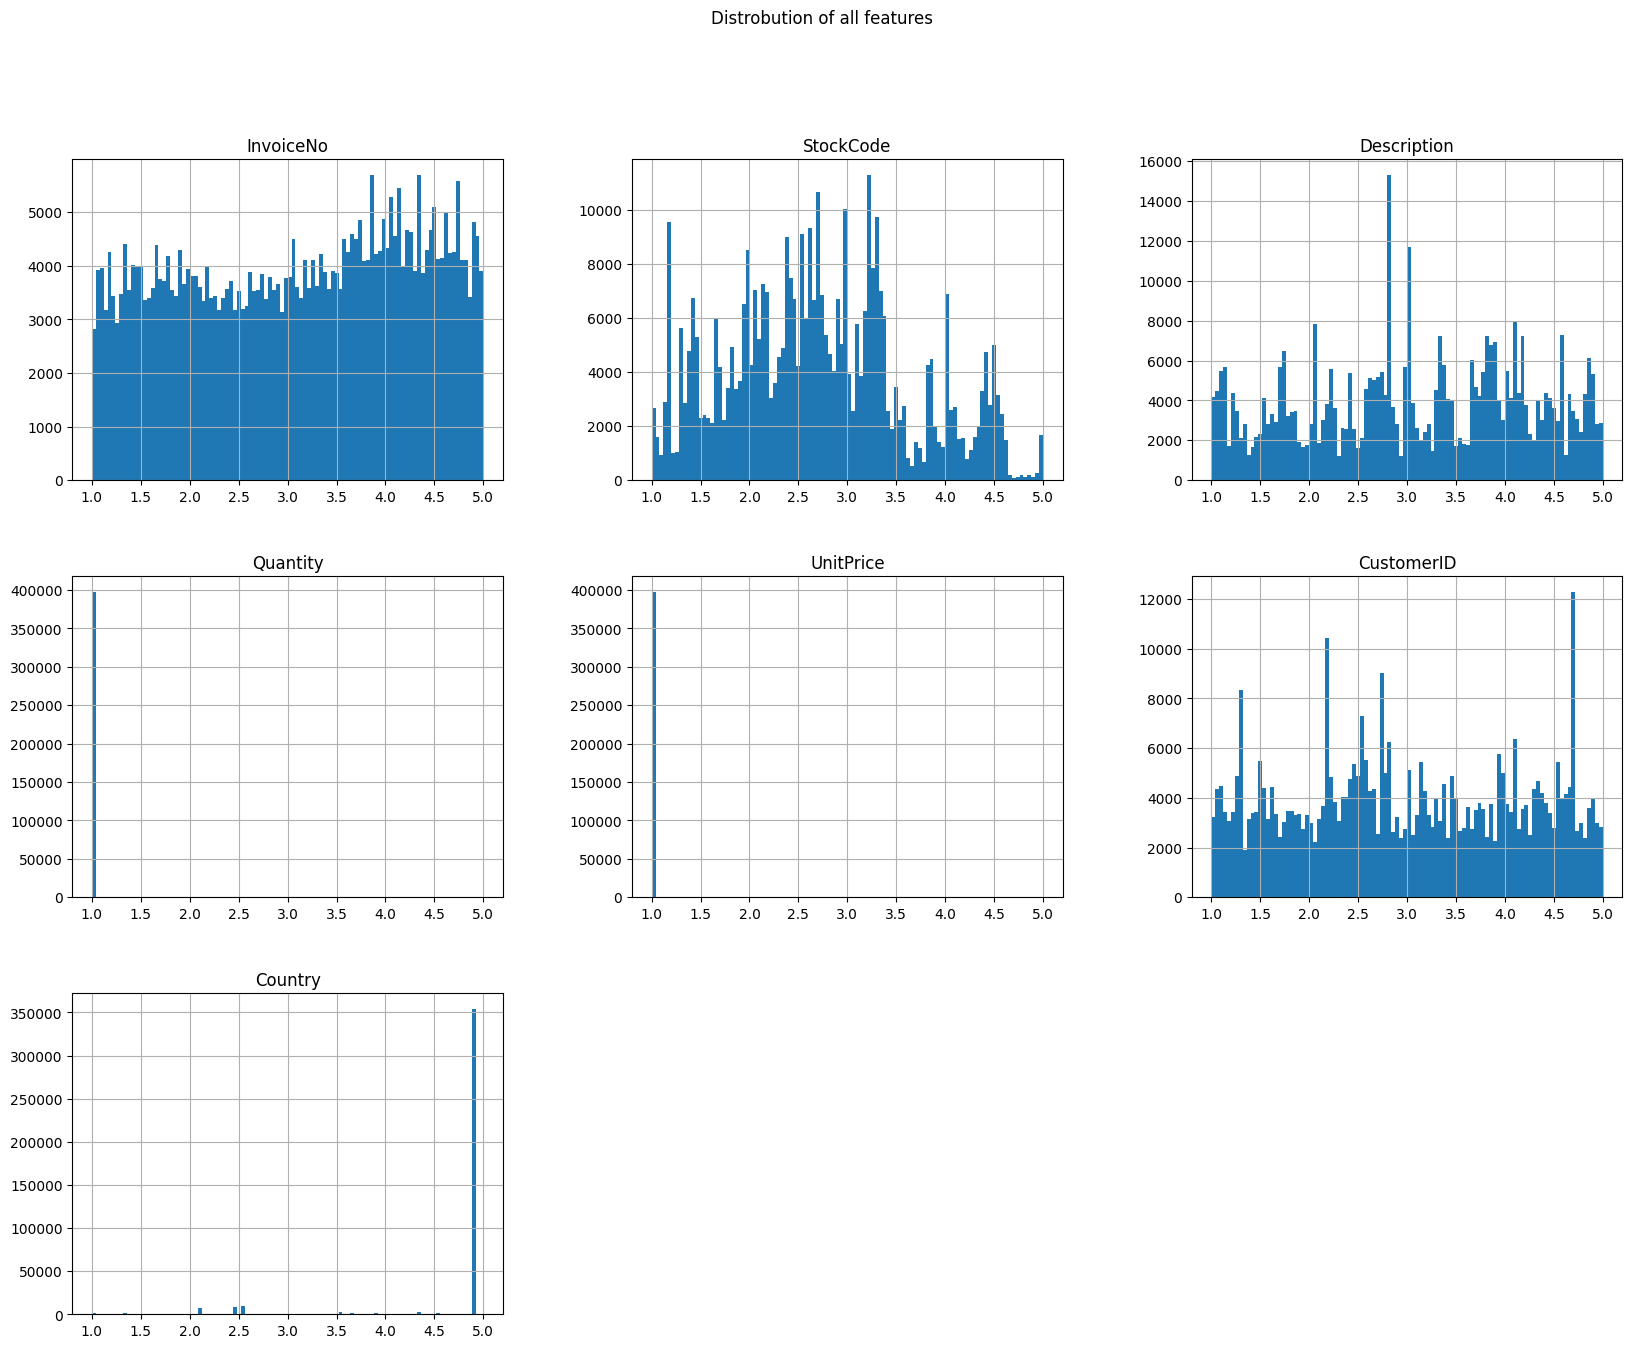

In [12]:
normalized_df.hist(bins=100,figsize=(20,15))
plt.suptitle('Distrobution of all features')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

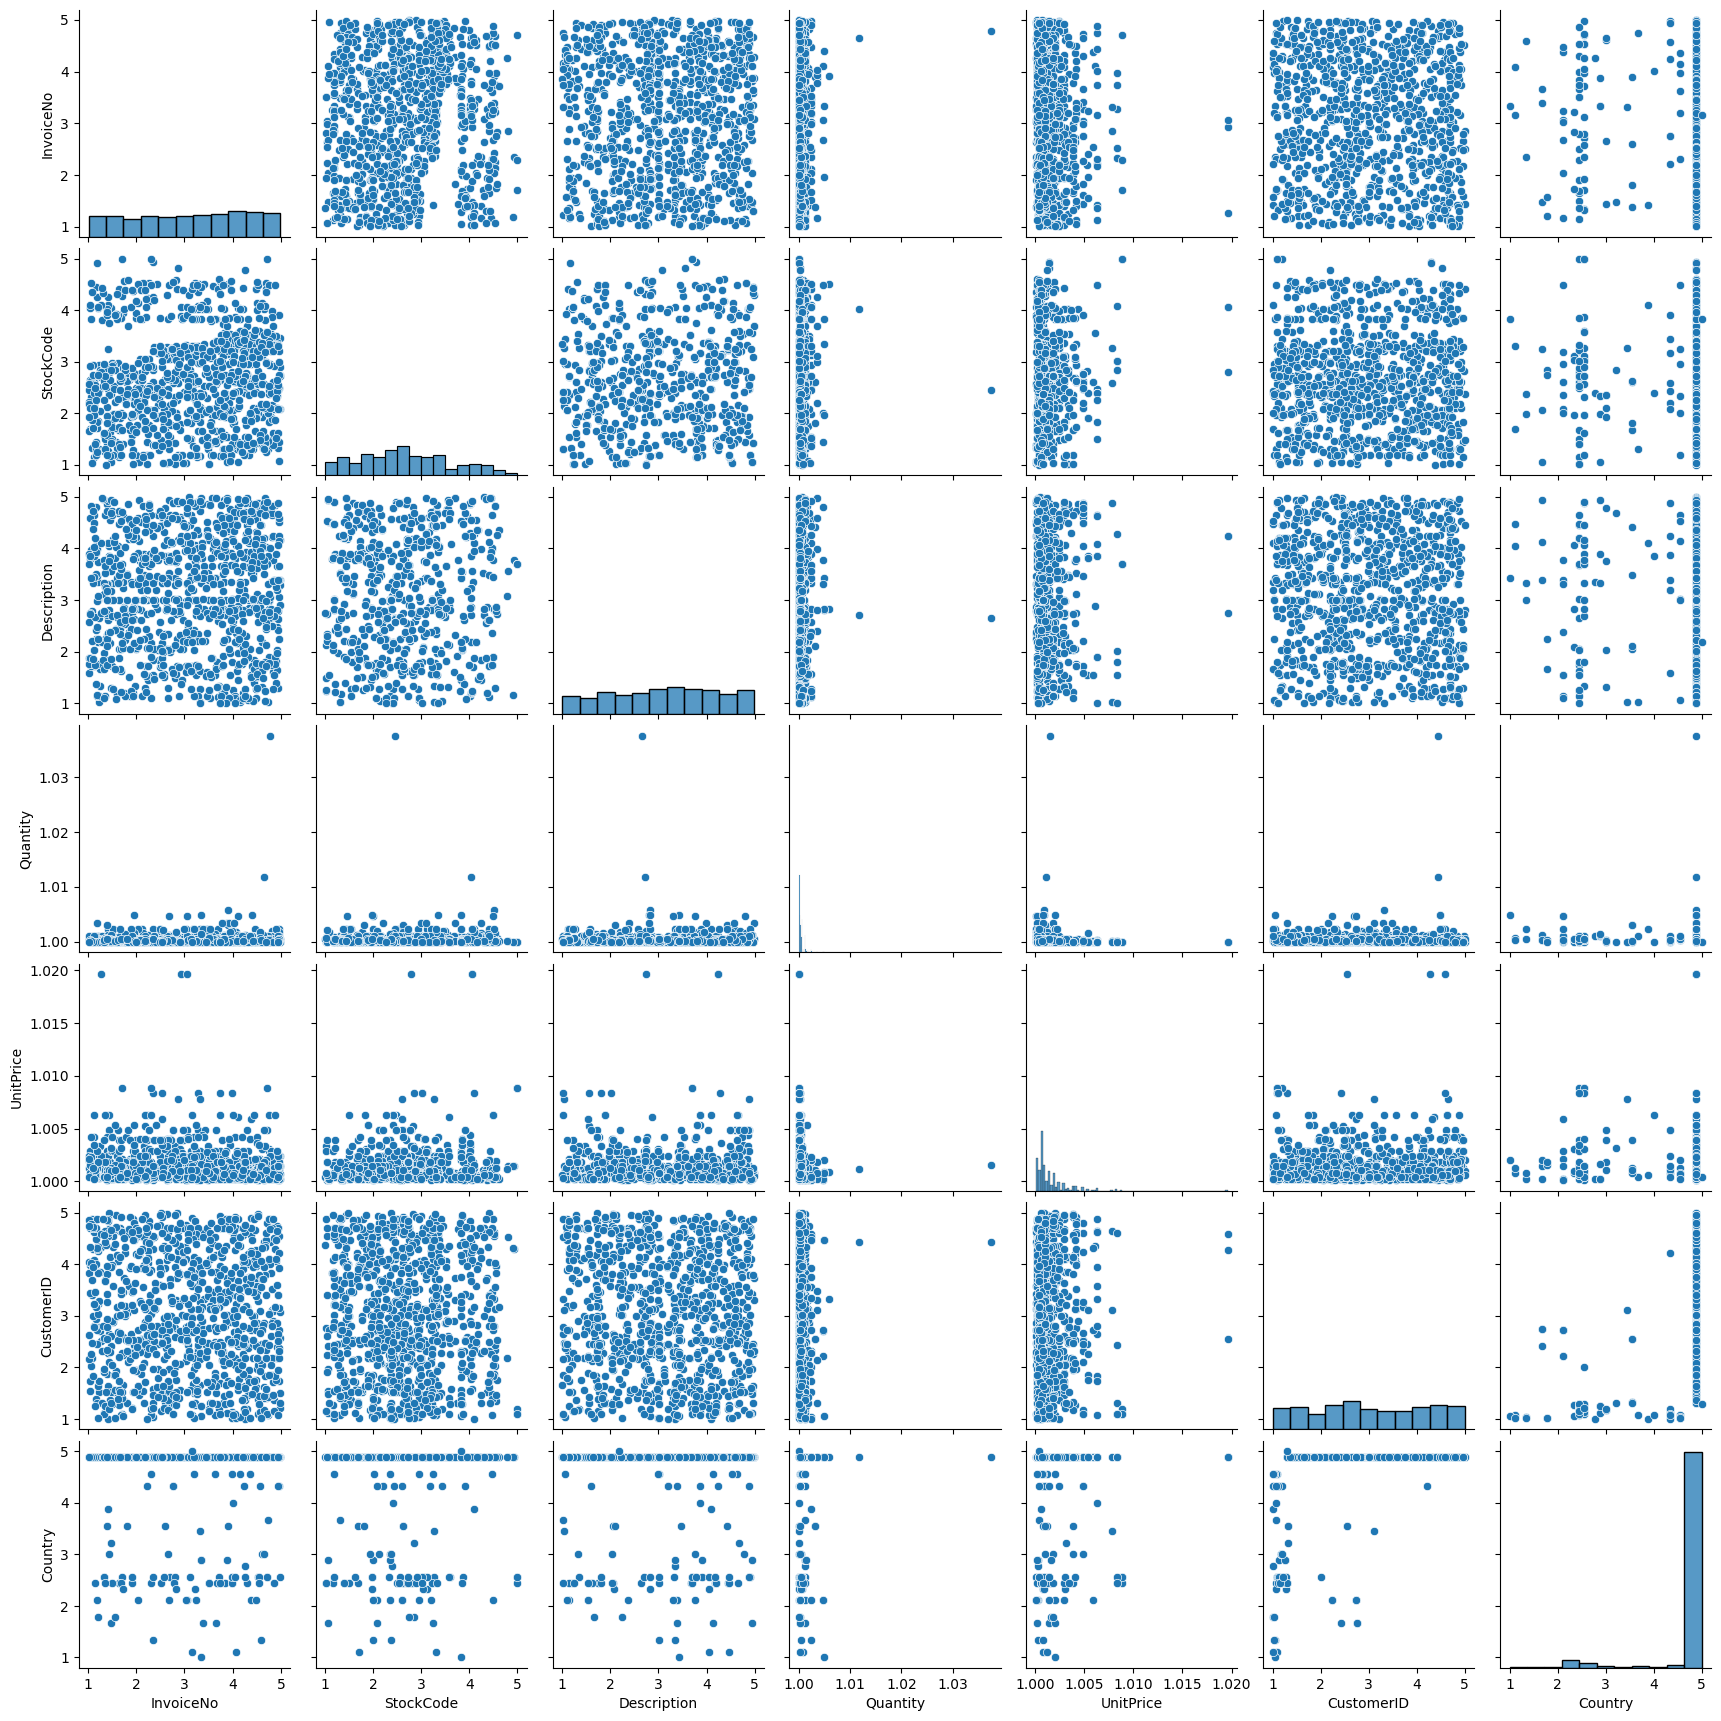

In [13]:
sns.pairplot(normalized_df.sample(1000))
plt.show()

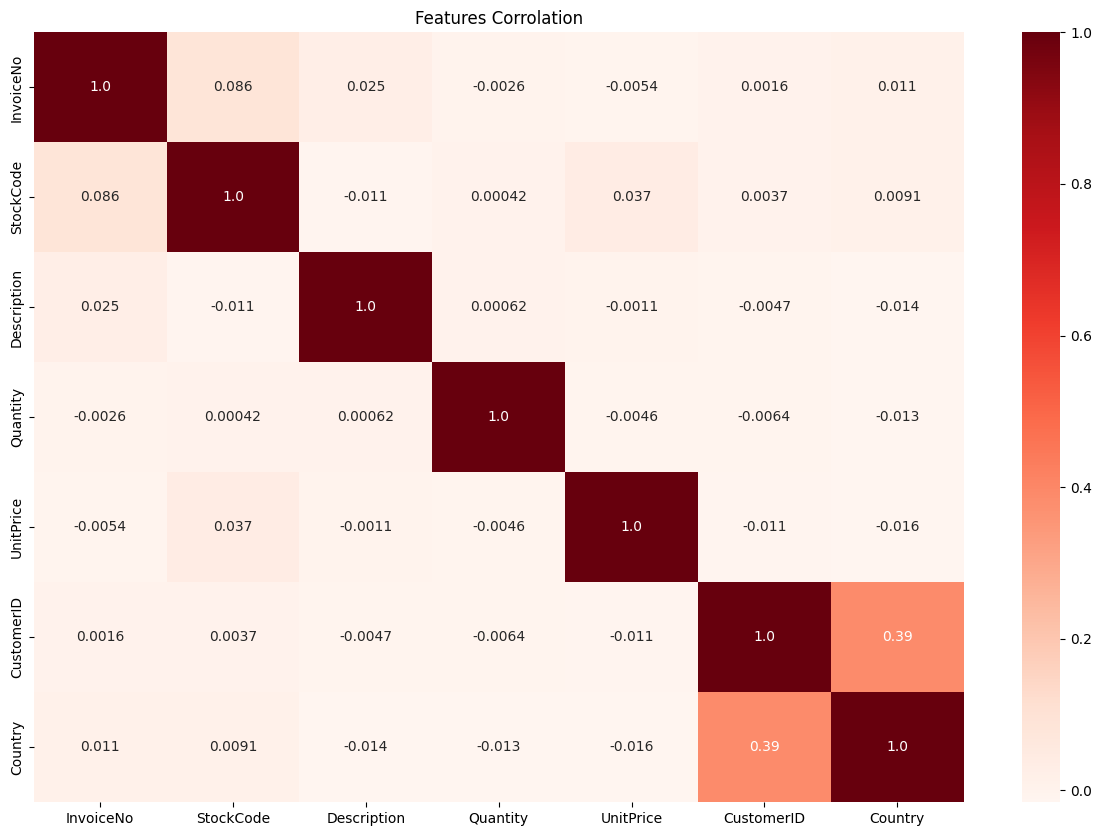

In [14]:
corr = normalized_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True,cmap = plt.cm.Reds, fmt = '0.2')
plt.title('Features Corrolation')
plt.show()

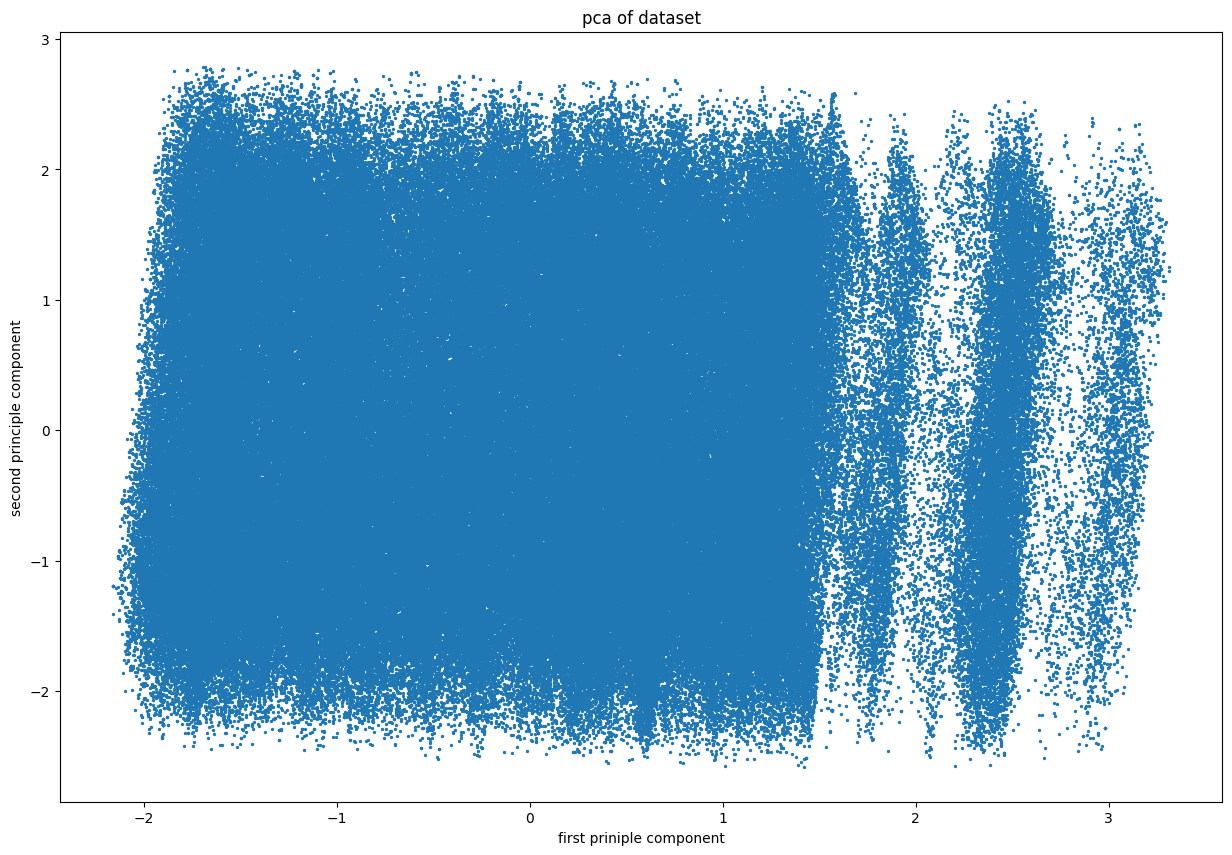

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('pca of dataset')
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


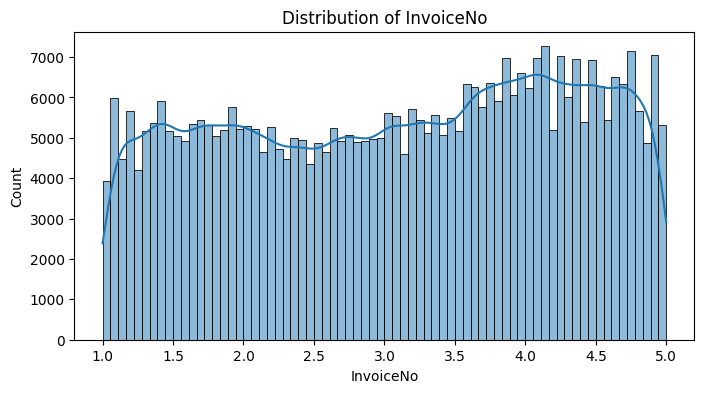

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


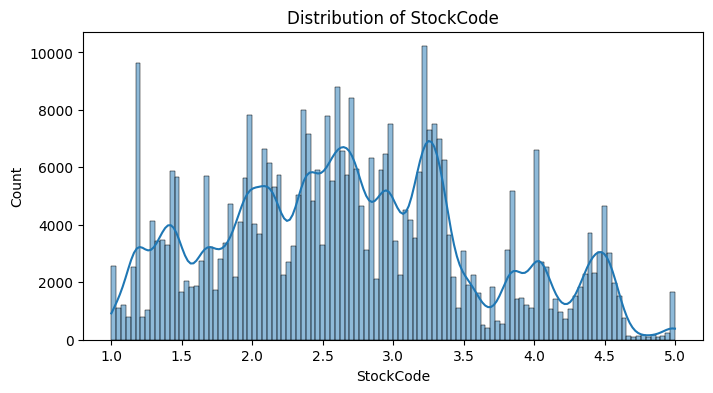

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


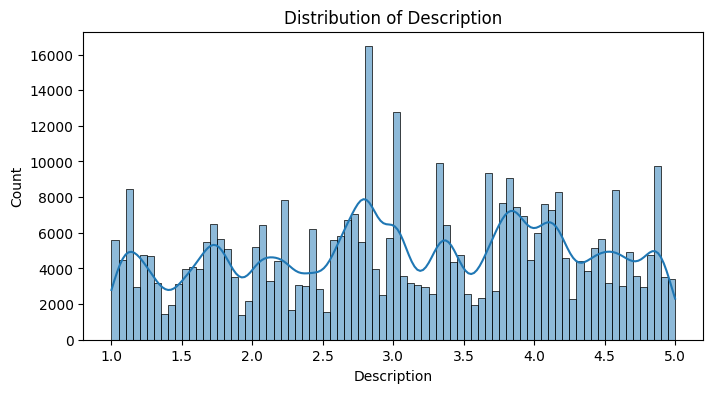

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


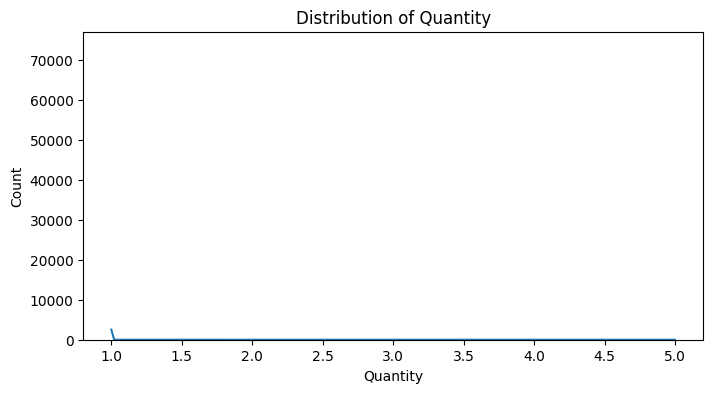

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


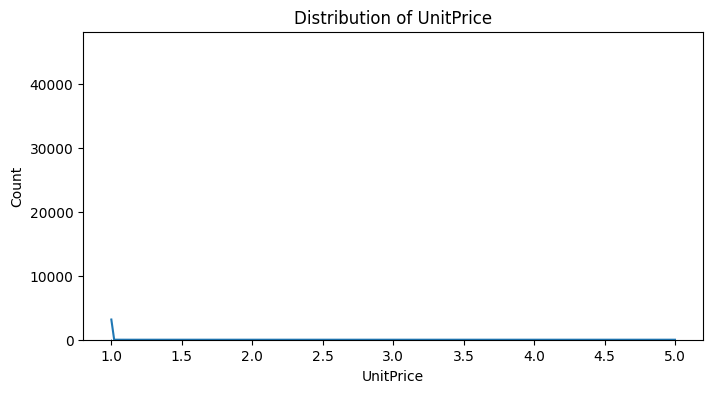

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


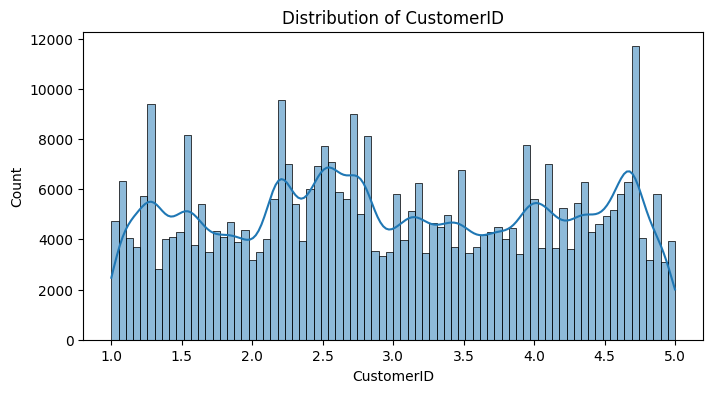

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


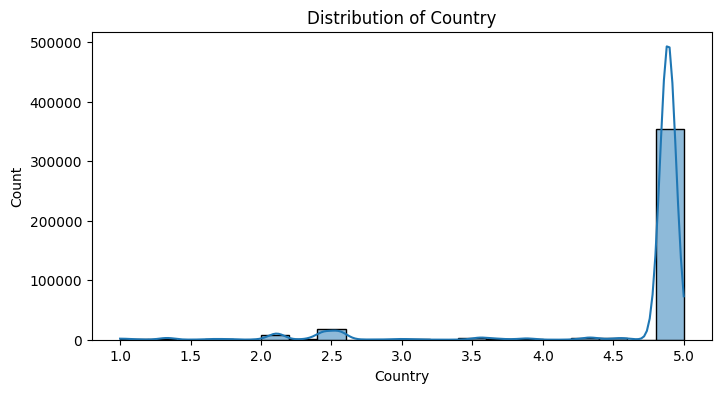

In [16]:
for col in normalized_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(normalized_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


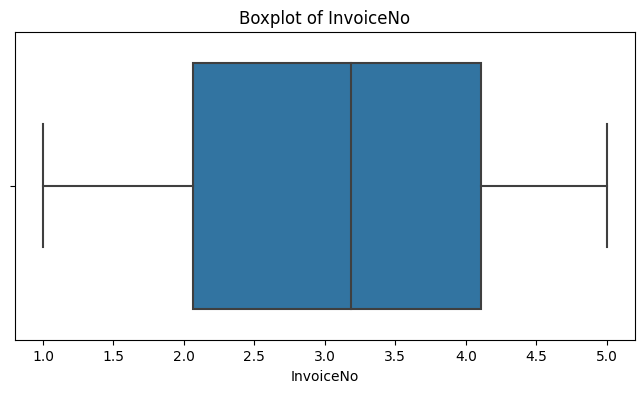

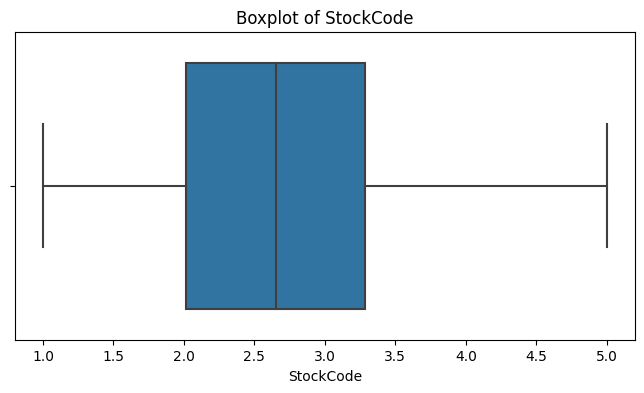

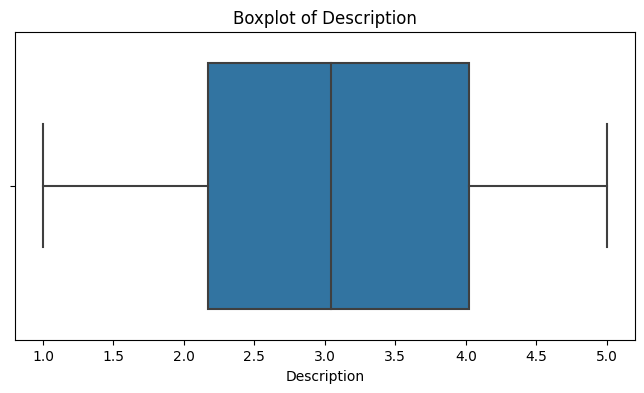

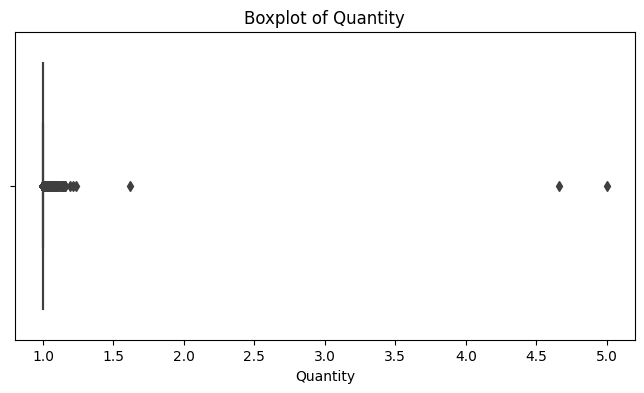

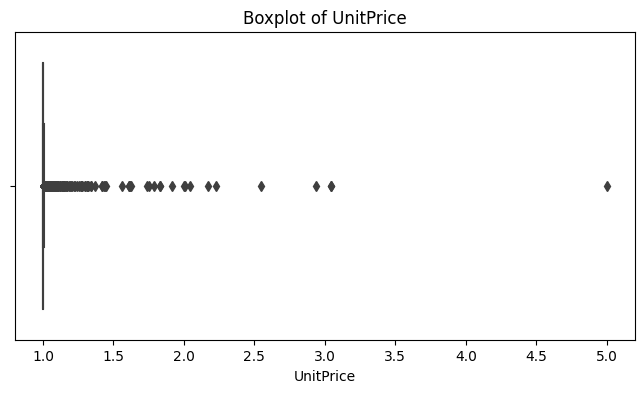

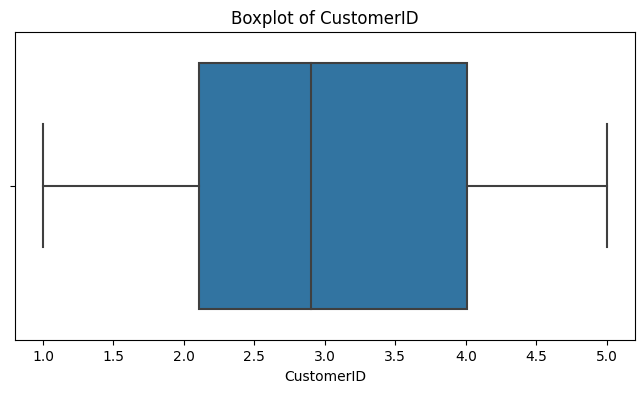

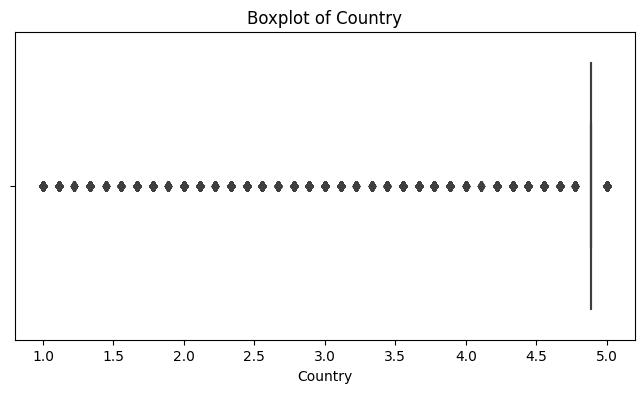

In [17]:
for col in normalized_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=normalized_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Clustering and Evaluation

In this section, we perform K-Means clustering on the dataset, evaluate the clustering performance using various metrics, and visualize the results. The main goals are:

1. **Determine the Optimal Number of Clusters**:
   - We use the Elbow method to find the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different values of K. The "elbow" point in the plot indicates the optimal number of clusters.

2. **Evaluate Clustering Performance**:
   - We evaluate the clustering performance using three different metrics: Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Score. These metrics help us understand the quality of the clustering and compare different values of K.

3. **Visualize Clustering Results**:
   - We visualize the clustering results using scatter plots to see how the data points are grouped into different clusters. This helps in understanding the distribution of data points across clusters.

4. **Principal Component Analysis (PCA)**:
   - We perform PCA to reduce the dimensionality of the data and visualize the clusters in a lower-dimensional space. This helps in understanding the variance explained by different principal components and visualizing the clusters in 2D and 3D plots.

5. **Final Clustering with Optimal K**:
   - We perform K-Means clustering with the optimal number of clusters (K=5 in this case) and visualize the final clustering results. We also add the cluster labels to the DataFrame for further analysis.

By following these steps, we can effectively cluster the dataset, evaluate the clustering performance, and visualize the results to gain valuable insights into the data.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

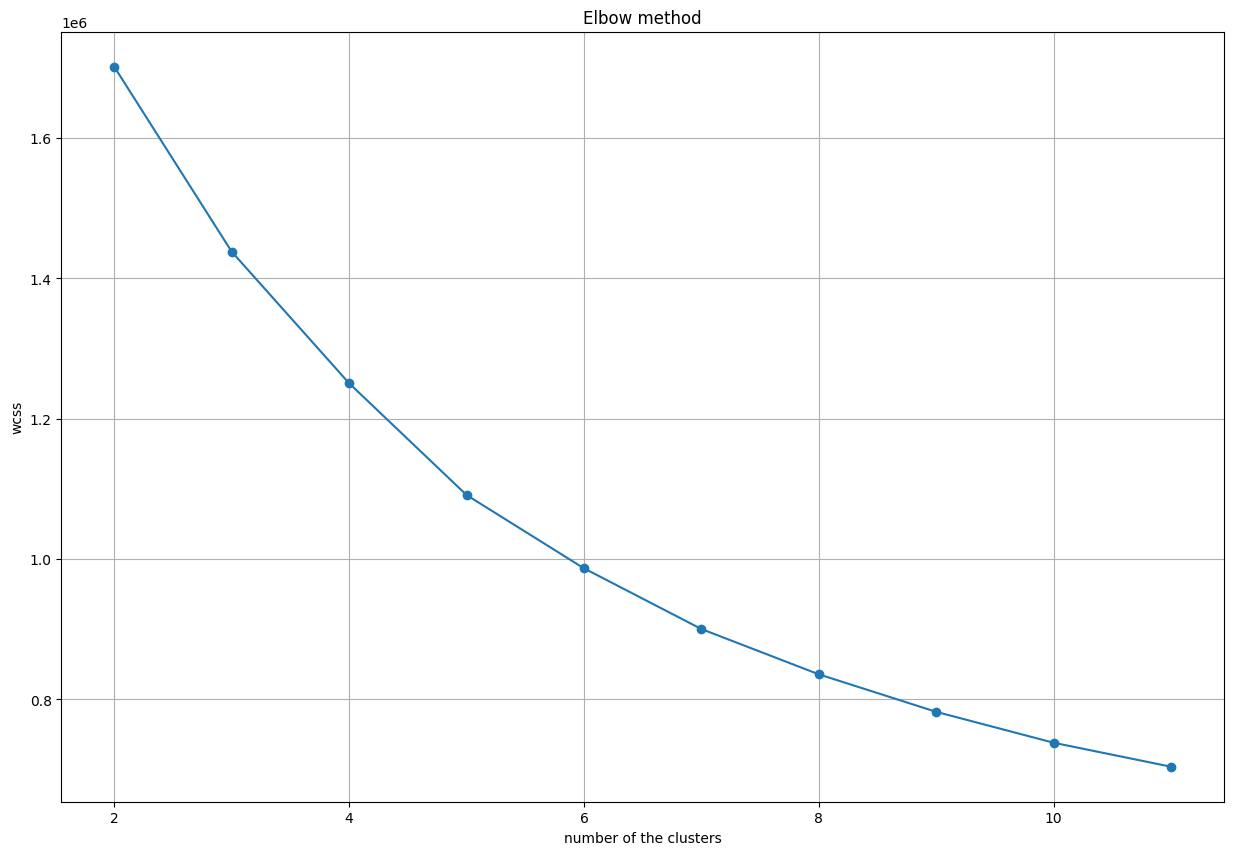

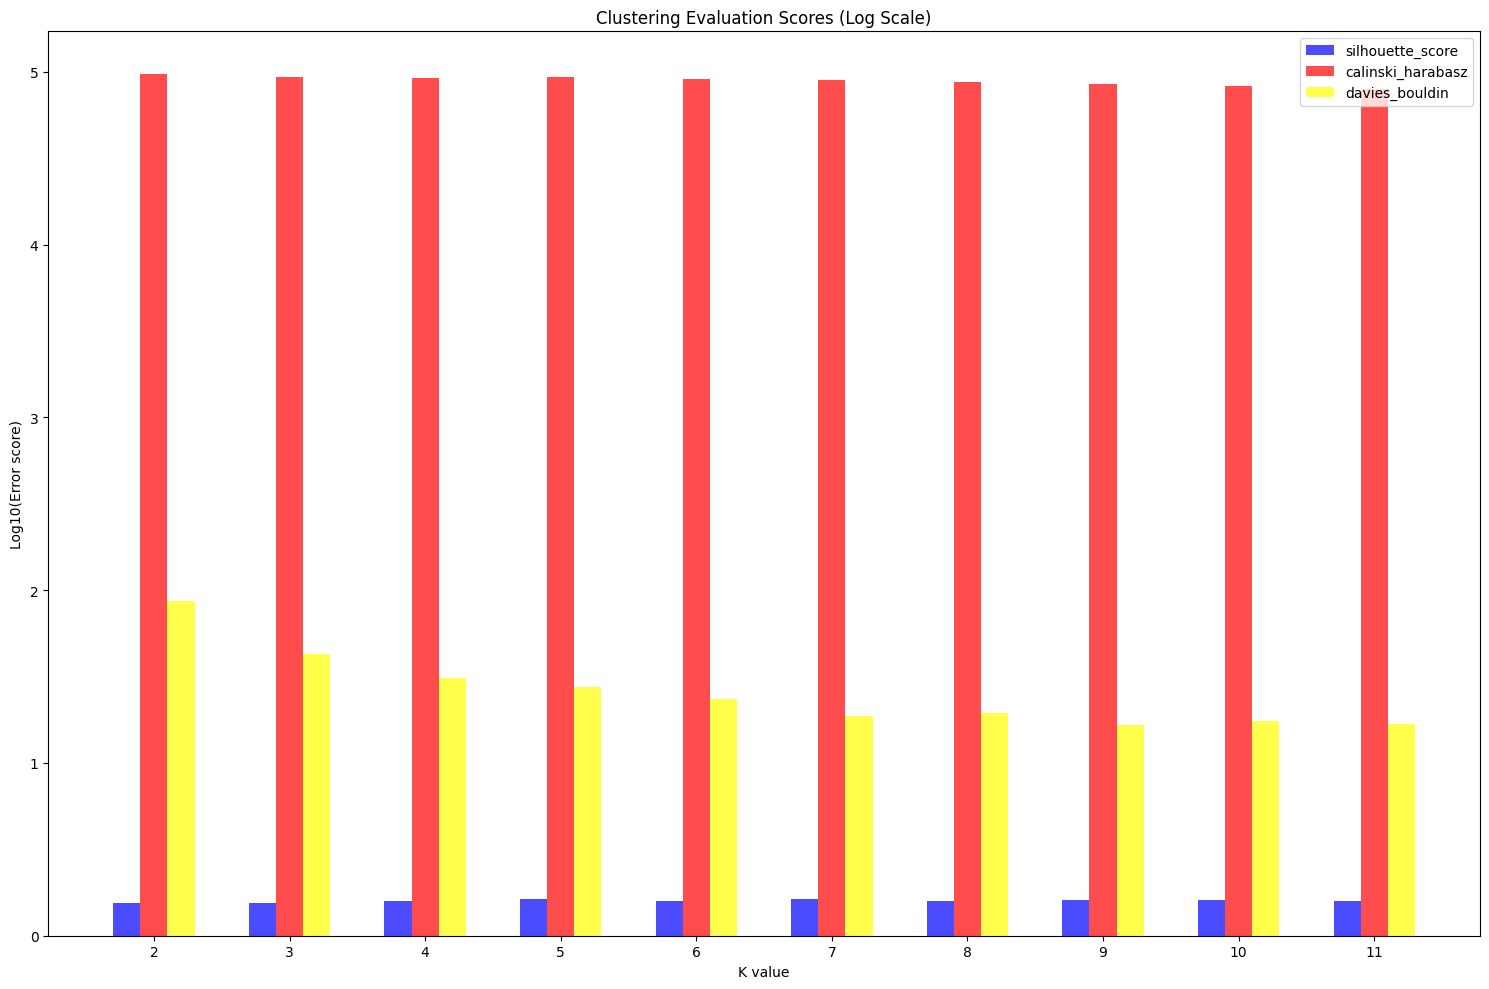

,k_value,silhouette_score,calinski_harabasz,davies_bouldin
0,2,0.187931,96647.845854,1.934824
1,3,0.188547,93651.112812,1.630681
2,4,0.203845,91680.567839,1.493925
3,5,0.211520,93317.792726,1.441949
4,6,0.201633,90984.715012,1.371621
5,7,0.211404,89480.205504,1.269718
6,8,0.202708,87011.806188,1.290547
7,9,0.208277,84742.493579,1.220189
8,10,0.204076,82459.021447,1.244580
9,11,0.202776,79745.896493,1.227348


In [18]:
wcss = []
si_score,ca_score,da_score = [],[],[]
k_value = [i for i in range (2,12)]

for k in range(2,12):
    
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(normalized_df)
    labels = km.predict(normalized_df)
    
    #evaluation process
    
    si_score.append(silhouette_score(normalized_df,labels,sample_size=30000))
    ca_score.append(calinski_harabasz_score(normalized_df,labels))
    da_score.append(davies_bouldin_score(normalized_df,labels))
    wcss.append(km.inertia_)
    
    
    # ploting process
    
plt.figure(figsize=(15,10))
plt.plot(range(2,12),wcss,marker = 'o')
plt.xlabel('number of the clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.grid()
plt.show()


plt.figure(figsize=(15,10))
bar_width = 0.2
index = np.arange(len(k_value))
plt.bar(index,si_score ,bar_width,label = 'silhouette_score',color = 'blue',alpha = 0.7)
plt.bar(index + bar_width ,np.log10(ca_score),bar_width,label = 'calinski_harabasz',color = 'red',alpha = 0.7)
plt.bar(index + 2*bar_width ,da_score,bar_width,label = 'davies_bouldin',color = 'yellow',alpha = 0.7)

plt.xlabel('K value')
plt.ylabel('Log10(Error score)')
plt.title('Clustering Evaluation Scores (Log Scale)')
plt.xticks(index+bar_width,k_value)
plt.legend()
plt.tight_layout()
plt.show()

error_dic = {'k_value':k_value,
             'silhouette_score':si_score,
             'calinski_harabasz':ca_score,
             'davies_bouldin':da_score}

error_df = pd.DataFrame(error_dic)
error_df

In [19]:
km = KMeans(n_clusters=5,random_state=0)
km.fit(normalized_df)
labels = km.predict(normalized_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


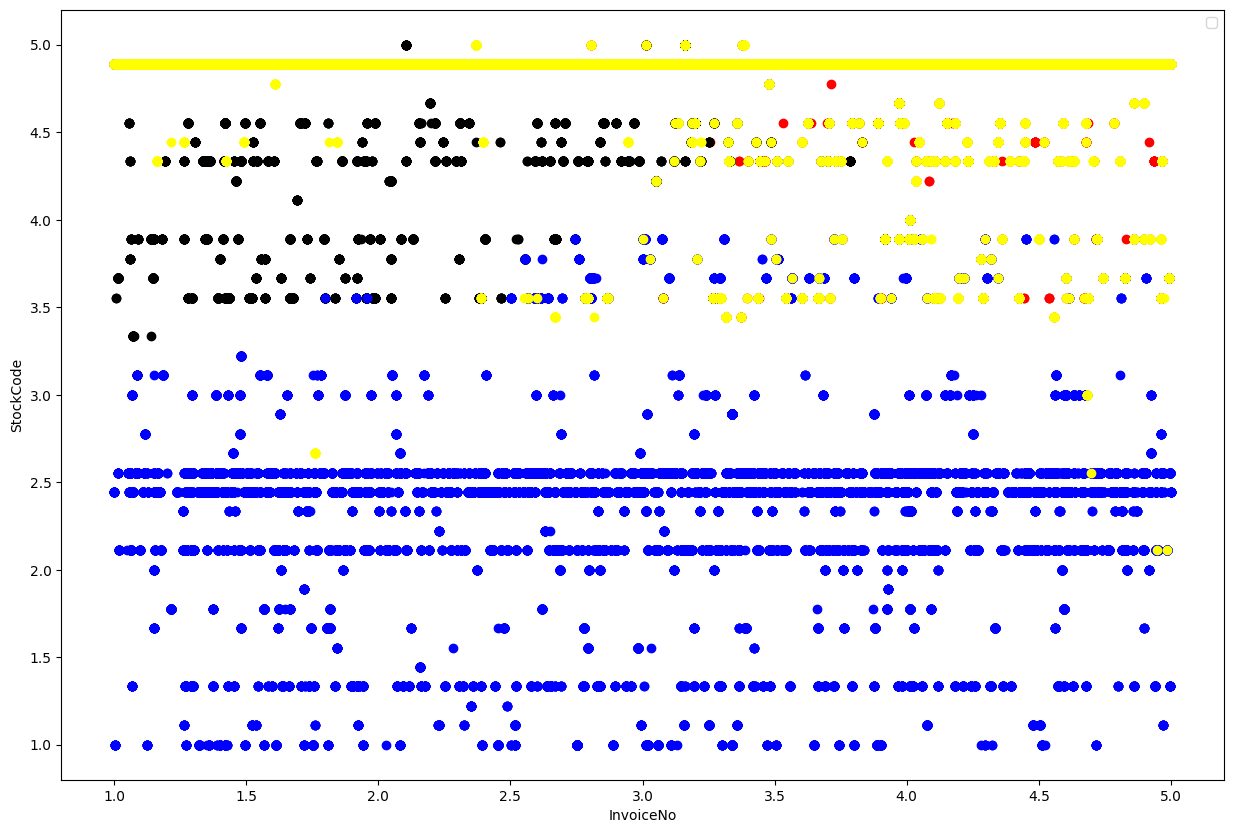

In [20]:
normalized_df['K-mean-cluster'] = labels
df_1 = normalized_df[normalized_df['K-mean-cluster'] == 0]
df_2 = normalized_df[normalized_df['K-mean-cluster'] == 1]
df_3 = normalized_df[normalized_df['K-mean-cluster'] == 2]
df_4 = normalized_df[normalized_df['K-mean-cluster'] == 3]
df_5 = normalized_df[normalized_df['K-mean-cluster'] == 4]

plt.figure(figsize=(15,10))
plt.scatter(df_1.InvoiceNo,df_1.Country,color = 'red')
plt.scatter(df_2.InvoiceNo,df_2.Country,color = 'black')
plt.scatter(df_3.InvoiceNo,df_3.Country,color = 'blue')
plt.scatter(df_4.InvoiceNo,df_4.Country,color = 'yellow')
plt.scatter(df_5.InvoiceNo,df_5.Country,color = 'yellow')


plt.xlabel('InvoiceNo')
plt.ylabel('StockCode')
plt.legend()


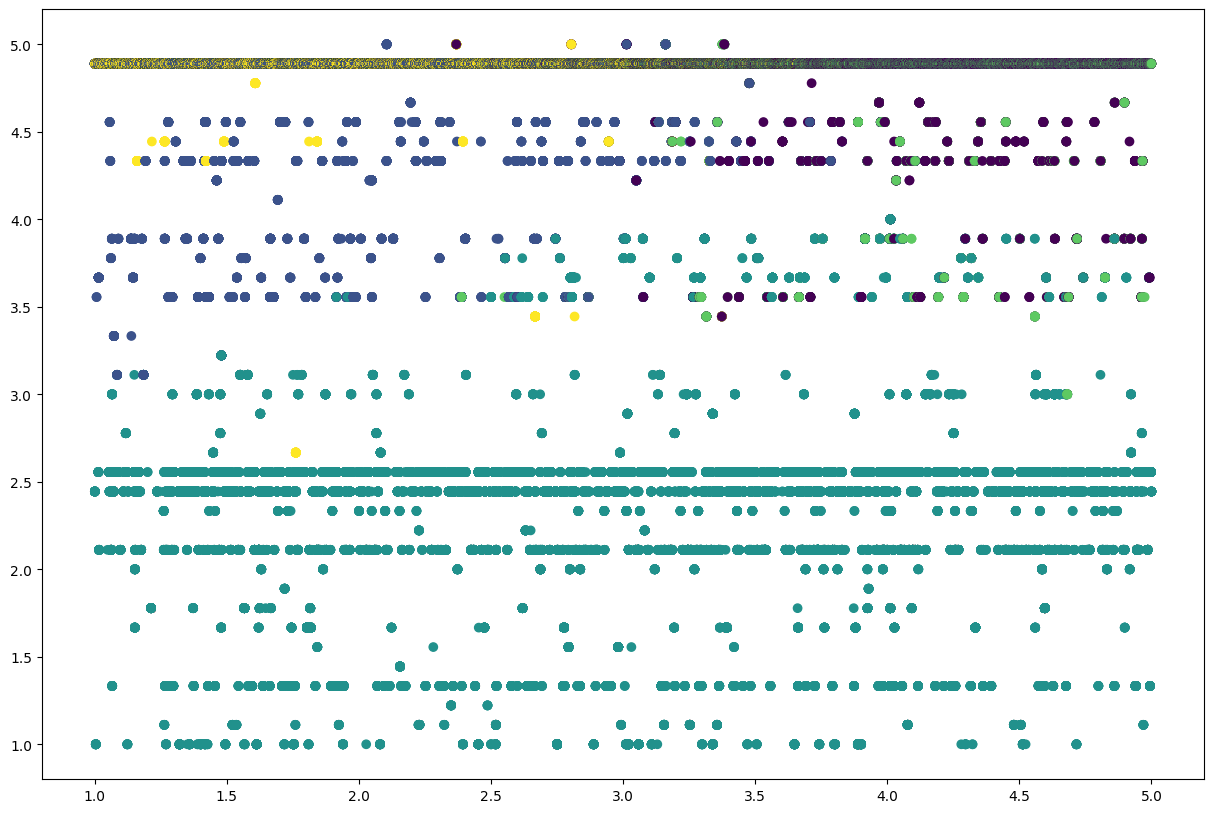

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(normalized_df.InvoiceNo,normalized_df.Country,c = normalized_df['K-mean-cluster'])

In [22]:
for i in range(2,6) :

    pca = PCA(n_components=i,random_state=0)
    pca_result = pca.fit_transform(normalized_df)
    explained_variance = pca.explained_variance_ratio_
    print(f'{i} component cover {np.sum(explained_variance)}')

2 component cover 0.5779854022173574
3 component cover 0.7491791464542608
4 component cover 0.8577790174619746
5 component cover 0.9524276212136896


the explained variance result : [0.39150206 0.18648335 0.17119374 0.10859987]


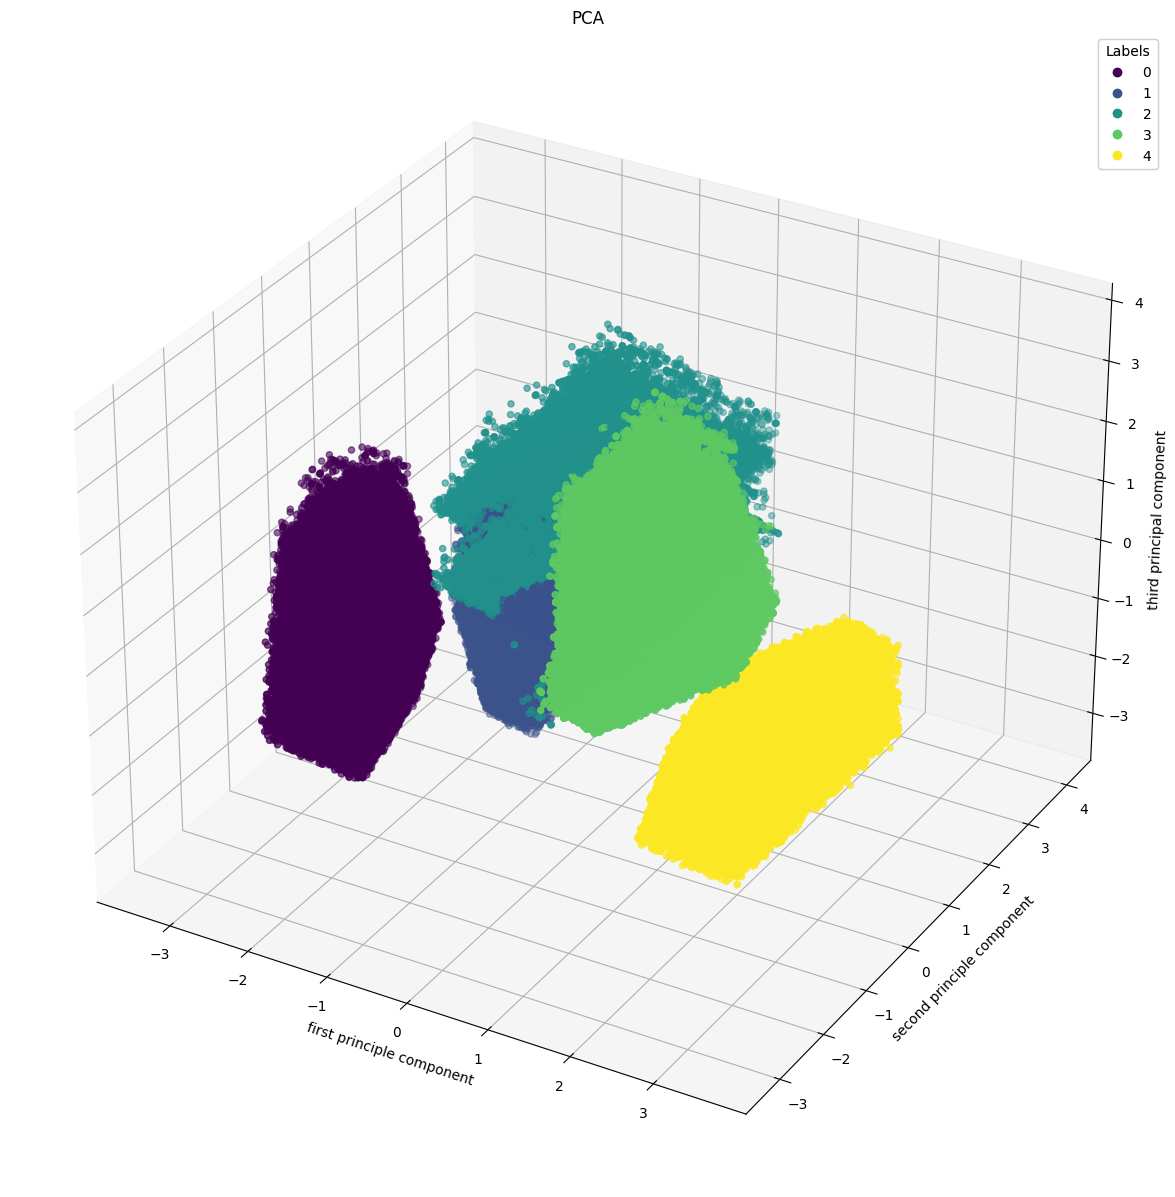

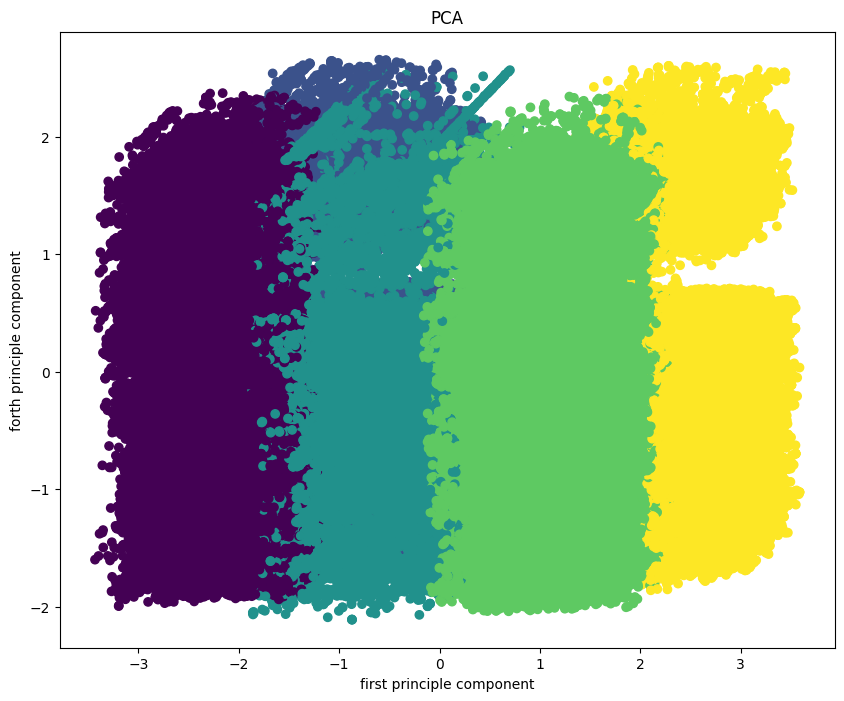

In [23]:
pca = PCA(n_components=4,random_state=0)
pca_result = pca.fit_transform(normalized_df)
print(f'the explained variance result : {pca.explained_variance_ratio_}')

plt.figure(figsize=(25,15))
ax = plt.axes(projection = '3d')

scatter = ax.scatter3D(pca_result[:,0],pca_result[:,1],pca_result[:,2],c=labels)
plt.xlabel('first principle component')
plt.ylabel('second principle component')
ax.set_zlabel('third principal component')
plt.title('PCA')
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,3],c=labels)
plt.xlabel('first principle component')
plt.ylabel('forth principle component')
plt.title('PCA')
plt.show()

# Mean Shift Clustering and Visualization

In this section, we perform Mean Shift clustering on a sample of the dataset and visualize the results. The main goals are:

1. **Sampling the Data**:
   - We take a random sample of 5000 rows from the normalized DataFrame to make the clustering process more efficient and manageable.

2. **Estimating Bandwidth**:
   - We estimate the bandwidth parameter for the Mean Shift algorithm using the `estimate_bandwidth` function. The bandwidth determines the size of the region to search for the mode (highest density) of the data.

3. **Performing Mean Shift Clustering**:
   - We perform Mean Shift clustering on the sampled data using the estimated bandwidth. Mean Shift is a non-parametric clustering algorithm that does not require specifying the number of clusters in advance. It works by shifting data points towards the mode of the data.

4. **Adding Cluster Labels to the DataFrame**:
   - We add the cluster labels obtained from the Mean Shift algorithm as a new column in the sampled DataFrame. This allows us to identify which cluster each data point belongs to.

5. **Visualizing Clusters and Centroids**:
   - We create a scatter plot to visualize the clusters and their centroids. Each cluster is represented by a different color, and the centroids are marked with black 'x' symbols. This helps in understanding the distribution of data points across different clusters and the location of the cluster centers.

By following these steps, we can effectively cluster the sampled dataset using Mean Shift, evaluate the clustering performance, and visualize the results to gain valuable insights into the data.


In [24]:
sample_data = normalized_df.sample(5000)
sample_data.reset_index(drop=True,inplace=True)
sample_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,K-mean-cluster
0,2.977448,3.835732,1.451861,1.000000,1.002677,4.698925,4.888889,3
1,3.947073,4.528645,4.816175,1.000049,1.001449,3.871654,4.888889,0
2,3.512004,2.561770,4.888062,1.000099,1.000418,4.999085,4.888889,0
3,3.539844,2.251154,2.130680,1.001531,1.000192,4.418897,4.888889,3
4,2.268087,2.336954,3.017972,1.000543,1.001253,1.254404,2.444444,2
...,...,...,...,...,...,...,...,...
4995,1.905962,1.284551,4.231836,1.000099,1.001449,1.217799,2.444444,2
4996,1.884597,4.143090,2.202567,1.000741,1.000206,2.153054,4.888889,1
4997,1.097977,4.997828,3.197689,1.000543,1.000093,3.398536,4.888889,4
4998,1.072080,2.831116,2.719127,1.000000,1.002284,2.669183,4.888889,1


In [25]:
bandwith = estimate_bandwidth(sample_data,quantile=0.2,random_state=0)
bandwith

2.6677480453453986

In [26]:
ms = MeanShift(bandwidth=2.5)
ms.fit(sample_data)
ms_label = ms.labels_
ms_center = ms.cluster_centers_
np.unique(ms_label)

array([0, 1, 2])

In [27]:
sample_data['Mean-shift-cluster'] = ms_label
sample_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,K-mean-cluster,Mean-shift-cluster
0,2.977448,3.835732,1.451861,1.000000,1.002677,4.698925,4.888889,3,1
1,3.947073,4.528645,4.816175,1.000049,1.001449,3.871654,4.888889,0,0
2,3.512004,2.561770,4.888062,1.000099,1.000418,4.999085,4.888889,0,0
3,3.539844,2.251154,2.130680,1.001531,1.000192,4.418897,4.888889,3,1
4,2.268087,2.336954,3.017972,1.000543,1.001253,1.254404,2.444444,2,2
...,...,...,...,...,...,...,...,...,...
4995,1.905962,1.284551,4.231836,1.000099,1.001449,1.217799,2.444444,2,2
4996,1.884597,4.143090,2.202567,1.000741,1.000206,2.153054,4.888889,1,0
4997,1.097977,4.997828,3.197689,1.000543,1.000093,3.398536,4.888889,4,1
4998,1.072080,2.831116,2.719127,1.000000,1.002284,2.669183,4.888889,1,0


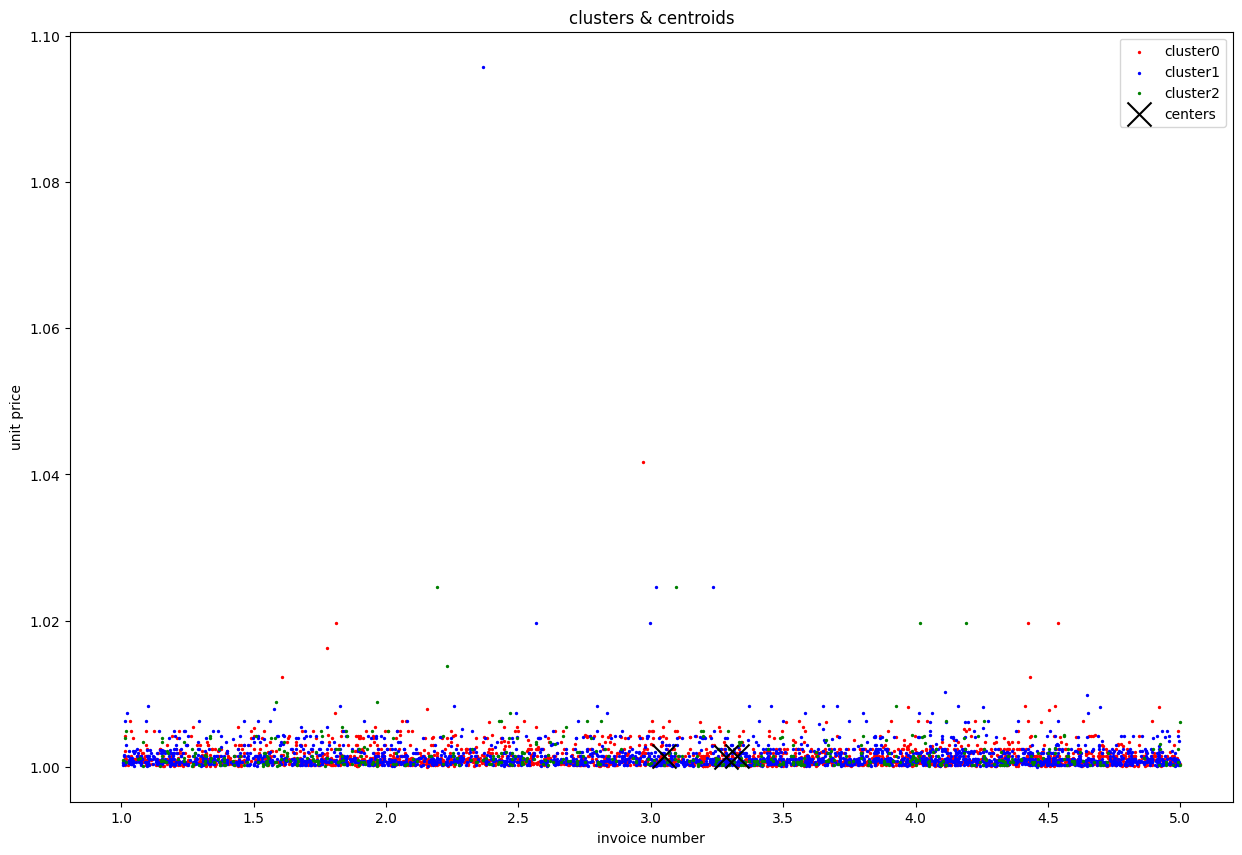

In [28]:
plt.figure(figsize=(15,10))
unique_clusters = np.unique(ms_label)
color_dic = {0:'red',1:'blue',2:'green'}
for i in unique_clusters : 
    df = sample_data[sample_data['Mean-shift-cluster'] == i]
    labels = df['Mean-shift-cluster']
    plt.scatter(df.iloc[:,0],df.iloc[:,4],color = color_dic[i],label = f'cluster{i}',s = 2)

    
plt.scatter(ms_center[:,0],ms_center[:,4],color = 'black', s = 300, marker = 'x',label = 'centers')
plt.xlabel('invoice number')
plt.ylabel('unit price')
plt.title('clusters & centroids')
plt.legend()
plt.show()